## Objetivo del notebook 

Analizar los resultados cuantitativos y cualitativos del modelo BETO,
visualizarlos en gráficos y redactar hallazgos interpretativos que alimenten el capítulo de Resultados y Discusión de la tesis.

In [1]:
# === BLOQUE 0: Setup seguro tras reinicio ===
from pathlib import Path

def find_root(start: Path = Path.cwd()):
    p = start.resolve()
    for _ in range(10):
        if (p / "data" / "processed" / "clean_v2" / "folds").exists():
            return p
        if p.parent == p: break
        p = p.parent
    return start.resolve()

PROJECT_ROOT = find_root()
BASE = PROJECT_ROOT / "data" / "processed" / "clean_v2"
FOLDS_DIR = BASE / "folds"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("FOLDS_DIR   :", FOLDS_DIR)


PROJECT_ROOT: D:\_ JCAM 2010-2028\_3_MASTERAI_UNI\Ciclo4\Tesis 2 Proyecto\ProyectoClasificador\ClasificadorsemanticoBETO
FOLDS_DIR   : D:\_ JCAM 2010-2028\_3_MASTERAI_UNI\Ciclo4\Tesis 2 Proyecto\ProyectoClasificador\ClasificadorsemanticoBETO\data\processed\clean_v2\folds


In [2]:
# === BLOQUE 1: Importaciones y carga de resultados ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Rutas principales
PROJECT_ROOT = Path.cwd().parent
RESULTS_DIR = PROJECT_ROOT / "models"
FOLDS_DIR = PROJECT_ROOT / "data" / "processed" / "clean_v2" / "folds"

# Buscar métricas guardadas
metrics_files = list(RESULTS_DIR.glob("*/metrics.json"))
print("Archivos de métricas encontrados:", len(metrics_files))
for m in metrics_files:
    print(" -", m.name)


Archivos de métricas encontrados: 1
 - metrics.json


1) Consolidar métricas (Bloque 2)

Ejecuta tu Bloque 2 para crear df_metrics. Si imprime el promedio → perfecto.

2) Cargar también val_predictions.csv del mismo modelo

Usa este bloque mini (lo puedes llamar Bloque 1.5) para ubicar la carpeta del checkpoint y cargar las predicciones:

In [3]:
# === BLOQUE 1.5: ubicar carpeta del modelo y cargar val_predictions ===
from pathlib import Path
import json, pandas as pd

RESULTS_DIR = PROJECT_ROOT / "models"
metrics_files = list(RESULTS_DIR.glob("beto_fold*_final/metrics.json"))
assert metrics_files, "No hay metrics.json dentro de beto_fold*_final/"
CKPT_DIR = metrics_files[0].parent
print("CKPT_DIR:", CKPT_DIR)

val_pred_path = CKPT_DIR / "val_predictions.csv"
assert val_pred_path.exists(), f"No existe {val_pred_path}. Vuelve a NB3 y corre BLOQUE 13S."
val_preds = pd.read_csv(val_pred_path)
print(val_preds.head(3))


CKPT_DIR: d:\_ JCAM 2010-2028\_3_MASTERAI_UNI\Ciclo4\Tesis 2 Proyecto\ProyectoClasificador\ClasificadorsemanticoBETO\models\beto_fold0_final
                                                text  labels  y_true  y_pred
0             Habla de verdad y solo cuenta su parte       0       0       0
1  La fuerza del pueblo es más fuerte que cualqui...       3       3       3
2  Se dice ejemplo, pero su historia está llena d...       0       0       0


3) Matriz + reporte con etiquetas nominales (en NB4)

<Figure size 600x500 with 0 Axes>

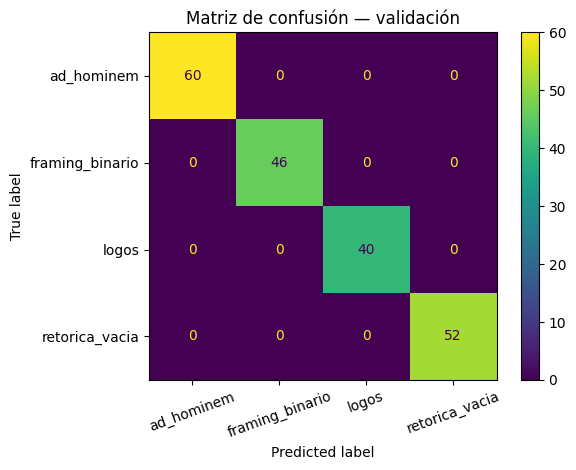

Accuracy: 1.0000

                 precision    recall  f1-score   support

     ad_hominem     1.0000    1.0000    1.0000        60
framing_binario     1.0000    1.0000    1.0000        46
          logos     1.0000    1.0000    1.0000        40
 retorica_vacia     1.0000    1.0000    1.0000        52

       accuracy                         1.0000       198
      macro avg     1.0000    1.0000    1.0000       198
   weighted avg     1.0000    1.0000    1.0000       198



In [4]:
# === BLOQUE 3R: Matriz y reporte usando val_predictions.csv ===
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

y_true = val_preds["y_true"].to_numpy()
y_pred = val_preds["y_pred"].to_numpy()

id2label = {0:"ad_hominem", 1:"framing_binario", 2:"logos", 3:"retorica_vacia"}
labels_order = [0,1,2,3]
names = [id2label[i] for i in labels_order]

cm = confusion_matrix(y_true, y_pred, labels=labels_order)
disp = ConfusionMatrixDisplay(cm, display_labels=names)
plt.figure(figsize=(6,5))
disp.plot(cmap="viridis", values_format="d")
plt.title("Matriz de confusión — validación")
plt.xticks(rotation=20); plt.tight_layout(); plt.show()

acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print(classification_report(y_true, y_pred, target_names=names, digits=4))


4) Gráfico comparativo BETO vs TF-IDF (si aún no lo hiciste)

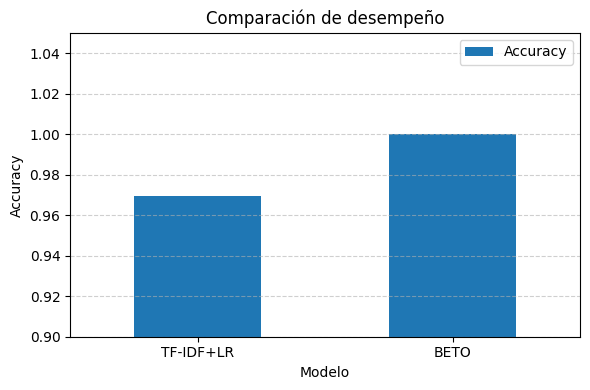

In [5]:
# === BLOQUE 4R: Comparación rápida ===
import pandas as pd, matplotlib.pyplot as plt
df_comp = pd.DataFrame({"Modelo":["TF-IDF+LR","BETO"], "Accuracy":[0.9696,1.0000]})
ax = df_comp.plot(kind="bar", x="Modelo", rot=0, figsize=(6,4))
ax.set_ylim(0.9,1.05); ax.set_ylabel("Accuracy"); ax.set_title("Comparación de desempeño")
ax.grid(axis="y", linestyle="--", alpha=0.6); plt.tight_layout(); plt.show()
